In [10]:
import xarray as xr
import os
import matplotlib.pyplot as plt
print(plt.style.available)

# Set plotting style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [11]:
# Define the path relative to the 'notebooks' directory
DATA_DIR = '../NetCDFDatafile/'

# List files and pick the first one as our sample
try:
    sample_filename = os.listdir(DATA_DIR)[2]
    file_path = os.path.join(DATA_DIR, sample_filename)
    print(f"Inspecting file: {file_path}")
    
except IndexError:
    print(f"Error: No files found in {DATA_DIR}. Please add a .nc file.")
    file_path = None

Inspecting file: ../NetCDFDatafile/ISAS20_ARGO_20110615_dat_DOXY.nc


In [14]:
if file_path:
    # Open the dataset
    ds = xr.open_dataset(file_path)

    # Print the summary of the dataset
    print(ds)

ValueError: Failed to decode variable 'JULD': unable to decode time units 'days since REFERENCE_DATE_TIME' with 'the default calendar'. Try opening your dataset with decode_times=False or installing cftime if it is not installed.

In [13]:
if file_path:
    print("--- Dimensions ---")
    # Dimensions define the size of each axis (e.g., 120 time points, 78 depth levels)
    print(ds.dims)

    print("\n--- Coordinates ---")
    # Coordinates are the labels for each point along a dimension (e.g., the actual timestamps, depth values)
    print(ds.coords)
    
    print("\n--- Data Variables ---")
    # Data variables are the actual scientific measurements (e.g., Temperature, Salinity)
    print(ds.data_vars)

    print("\n--- Global Attributes ---")
    # Attributes are metadata about the entire file (e.g., float ID, project name)
    print(ds.attrs)

--- Dimensions ---
FrozenMappingWarningOnValuesAccess({'longitude': 720, 'latitude': 545, 'depth': 4, 'time': 1})

--- Coordinates ---
Coordinates:
  * longitude  (longitude) float32 3kB -180.0 -179.5 -179.0 ... 179.0 179.5
  * latitude   (latitude) float32 2kB -77.01 -76.9 -76.78 ... 89.49 89.69 89.9
  * depth      (depth) float32 16B 1.0 3.0 5.0 10.0
  * time       (time) datetime64[ns] 8B 2002-01-15

--- Data Variables ---
Data variables:
    PSAL         (time, depth, latitude, longitude) float64 13MB ...
    PSAL_ERR     (time, depth, latitude, longitude) float64 13MB ...
    PSAL_PCTVAR  (time, depth, latitude, longitude) float32 6MB ...

--- Global Attributes ---
{'Conventions': 'CF-1.4', 'title': 'Monthly analysis', 'history': '20180605T151834L : Creation', 'institution': 'LOPS-SNO-Argo', 'project_name': 'ISAS-LOPS', 'analysis_name': 'ISAS15_SSS_', 'data_manager': 'Nicolas-Kolodziejczyk', 'software_version': 'POSTOA_main - 7.0', 'southernmost_latitude': '-77.0105', 'northernmos

--- Details for 'PSAL' variable ---
<xarray.DataArray 'PSAL' (time: 1, depth: 4, latitude: 545, longitude: 720)> Size: 13MB
[1569600 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 3kB -180.0 -179.5 -179.0 ... 179.0 179.5
  * latitude   (latitude) float32 2kB -77.01 -76.9 -76.78 ... 89.49 89.69 89.9
  * depth      (depth) float32 16B 1.0 3.0 5.0 10.0
  * time       (time) datetime64[ns] 8B 2003-12-15
Attributes:
    long_name:      Practical salinity
    standard_name:  sea_water_salinity
    units:          PSS-78
    valid_min:      -26000
    valid_max:      30000

--- Attributes of 'PSAL' ---
{'long_name': 'Practical salinity', 'standard_name': 'sea_water_salinity', 'units': 'PSS-78', 'valid_min': -26000, 'valid_max': 30000}


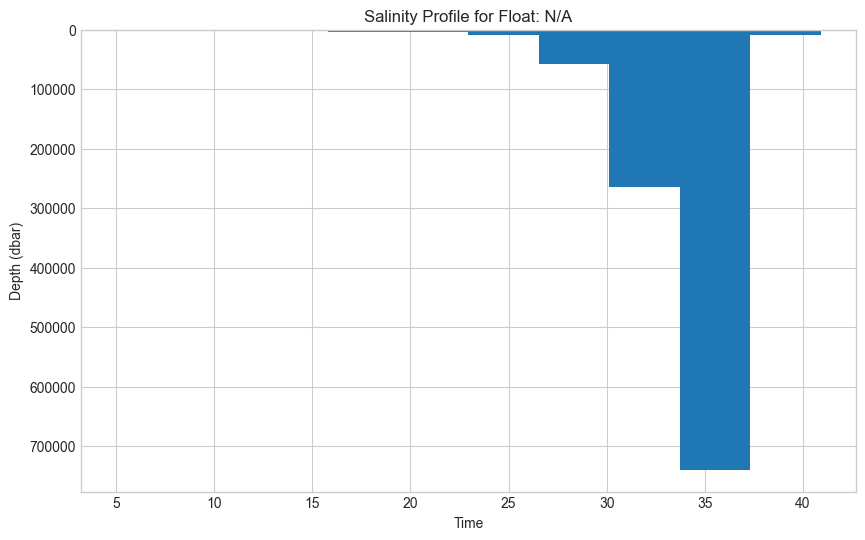

In [6]:
if 'PSAL' in ds.data_vars:
    psal_variable = ds['PSAL']
    
    print("--- Details for 'PSAL' variable ---")
    print(psal_variable)
    
    print("\n--- Attributes of 'PSAL' ---")
    print(psal_variable.attrs)
    
    psal_variable.plot(figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.title(f"Salinity Profile for Float: {ds.attrs.get('platform_id', 'N/A')}")
    plt.ylabel("Depth (dbar)")
    plt.xlabel("Time")
    plt.show()


--- Visualizing Salinity Profile ---


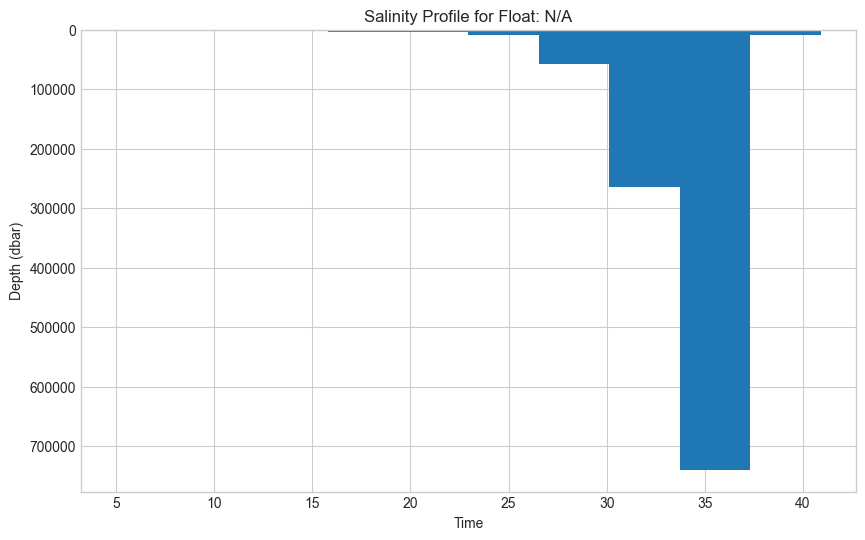

In [7]:
if file_path:
    if 'TEMP' in ds.data_vars:
        print("--- Visualizing Temperature Profile ---")
        ds['TEMP'].plot(figsize=(10, 6))
        plt.gca().invert_yaxis()
        plt.title(f"Temperature Profile for Float: {ds.attrs.get('platform_id', 'N/A')}")
        plt.ylabel("Depth (dbar)")
        plt.xlabel("Time")
        plt.show()

    elif 'PSAL' in ds.data_vars:
        print("--- Visualizing Salinity Profile ---")
        ds['PSAL'].plot(figsize=(10, 6))
        plt.gca().invert_yaxis()
        plt.title(f"Salinity Profile for Float: {ds.attrs.get('platform_id', 'N/A')}")
        plt.ylabel("Depth (dbar)")
        plt.xlabel("Time")
        plt.show()

    else:
        print("No TEMP or PSAL variable found. Available:", list(ds.data_vars))
